In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

#This polymer dictionary is used for calculation. New polyelectroytes must be added to dictionary before analysis

polymer_dict = {'Chitosan' : {'abbr':'CS', 'pK':6.5, 'DoP':744.2322004, 'MW':120000, 'ni':595.3858, 'CpMax':595.3858, 'plotcolor':'g'},
               'BPEI': {'abbr':'BPEI', 'pK1':11.6, 'n1':211.2690934,'pK2':6.7, 'n2':158.4518201,'pK3':4.5, 'n3':211.269, 'DoP':52.817, 'MW':25000, 'CpMax':580.9229, 'plotcolor':'b'},
                'PAH': {'abbr':'PAH', 'pK':8.8, 'DoP':534.5, 'MW':50000, 'ni':534.5, 'CpMax':534.5, 'plotcolor' : 'salmon'},
                
               'Alginate' : {'abbr':'Alg', 'pK':3.2, 'DoP':1612.51, 'MW':155000, 'ni':1612.51, 'CpMax':-1612.51, 'plotcolor' : 'm'},
               'PAA' : {'abbr':'PAA', 'pK':4.5, 'DoP':1388.31, 'MW':100000, 'ni':1388.31, 'CpMax':-1388.31, 'plotcolor':'r'}}

In [54]:
#Calculate polyelectrolyte charge at a certain pH

def charge(polymer, pH):
    if polymer not in polymer_dict:
        print('That polymer is not available.')
    if polymer=='BPEI':
        Cp = ((polymer_dict['BPEI']['n1']*(1+10**( float(pH) - float(polymer_dict['BPEI']['pK1'])))**-1)+
              (polymer_dict['BPEI']['n2']*(1+10**( float(pH) - float(polymer_dict['BPEI']['pK2'])))**-1)+
              (polymer_dict['BPEI']['n3']*(1+10**( float(pH) - float(polymer_dict['BPEI']['pK3'])))**-1))
        return Cp
    if polymer=='Chitosan':
        Cp = (polymer_dict['Chitosan']['ni']*(1+10**( float(pH) - float(polymer_dict['Chitosan']['pK'])))**-1)
        return Cp
    if polymer=='PAH':
        Cp = (polymer_dict['PAH']['ni']*(1+10**( float(pH) - float(polymer_dict['PAH']['pK'])))**-1)
        return Cp    
    if polymer=='Alginate':
        Cp = (-1*polymer_dict['Alginate']['ni']*(1+10**(float(polymer_dict['Alginate']['pK']) - float(pH)))**-1)
        return Cp
    if polymer=='PAA':
        Cp = (-1*polymer_dict['PAA']['ni']*(1+10**( float(polymer_dict['PAA']['pK']) - float(pH)))**-1)
        return Cp

In [70]:
#Calculate percent charge of a polyelectrolyte at a given pH

def percent_charge(polymer, pH):
    if polymer not in polymer_dict:
        print('That polymer is not available.')
    
    if polymer_dict[polymer]['CpMax'] > 0:
        per_charge = (float(charge(polymer, pH)) / float(polymer_dict[polymer]['CpMax']))*100
        return per_charge
    
    if polymer_dict[polymer]['CpMax'] < 0:
        per_charge = (((float(charge(polymer, pH)) / float(polymer_dict[polymer]['CpMax']))*100))
        return per_charge

In [71]:
# calculate the change in %charge of a polyelectrolyte between two pH values

def delta_charge(polymer, PCpH, PApH):
    if polymer not in polymer_dict:
        print('That polymer is not available.')
    elif polymer_dict[polymer]['CpMax'] > 0:
        dCharge = percent_charge(polymer, PApH)-percent_charge(polymer, PCpH)
        return dCharge
    elif polymer_dict[polymer]['CpMax'] < 0:
        dCharge = percent_charge(polymer, PCpH)-percent_charge(polymer, PApH)
        return dCharge  

In [72]:
#add delta %charge of polycation and polyanion

def total_dCharge(polycation, PCpH, polyanion, PApH):
    return delta_charge(polycation, PCpH, PApH)+delta_charge(polyanion, PCpH, PApH)

In [73]:
#generate side-by-side plots of polyelectrolyte %charge and charge for a given polyelectrolyte pair with their respective solution pH values

def plot_pair(polycation, PCpH, polyanion, PApH):
    if polycation and polyanion not in polymer_dict:
        print('One or both polymers not available.')
        
    x_range = np.arange(min(PCpH, PApH)-.5, max(PCpH, PApH)+.5, (((max(PCpH, PApH) - ((min(PCpH, PApH))))/50)))
    
    PC_values = []
    PA_values = []
    
    PC_charge = []
    PA_charge = []
    
    for x in x_range:
        PC_value = percent_charge(polycation, x)
        PC_values.append(PC_value)
        PA_value = percent_charge(polyanion, x)
        PA_values.append(PA_value)        
        PC_char = charge(polycation, x)
        PC_charge.append(PC_char)
        PA_char = charge(polyanion, x)
        PA_charge.append(PA_char)     
        
    zeroes_charge = [0] * len(PA_charge)
        
    PC_dCharge = delta_charge(polycation, PCpH, PApH)
    PA_dCharge = delta_charge(polyanion, PCpH, PApH)
    cpm_pc = charge(polycation, PApH) - charge(polycation, PCpH)
    cpm_pa = charge(polyanion, PApH) - charge(polyanion, PCpH)
    
    if PA_dCharge > 0:
        word1 = 'gains'
    if PA_dCharge < 0:
        word1 = 'loses'     
    if PC_dCharge > 0:
        word2 = 'gains'
    if PC_dCharge < 0:
        word2= 'loses'
    
    
    
    if PA_dCharge > 0 and PC_dCharge > 0:
        result = 'Postive or Forward'
    if PA_dCharge < 0 and PC_dCharge < 0:
        result = 'Negative or Reverse'
    if PA_dCharge < 0 and PC_dCharge > 0:
        result = 'Mixed'
    if PA_dCharge > 0 and PC_dCharge < 0:
        result = 'Mixed'
    
    combined_percent_charge = PC_values + PA_values
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
    ax1 =  plt.subplot(121)
    ax1.plot(x_range, PC_values, label=polycation, color= polymer_dict[polycation]['plotcolor'], linewidth =2)
    ax1.plot(x_range, PA_values, label =polyanion, color=polymer_dict[polyanion]['plotcolor'], linewidth =2)
    ax1.legend(loc='lower right')
    
    ax1.annotate("1 - "+ polycation +' adsorbs\n at ' + str(round(percent_charge(polyanion, PApH)))+' % charge.', 
                 (PCpH, percent_charge(polycation, PCpH)), fontsize=12, horizontalalignment='left')
    #ax1.arrow(PCpH, percent_charge(polycation, PCpH), PApH, percent_charge(polycation, PApH))
                 
    ax1.annotate("2 - Dip into "+polyanion+' pH '+str(PApH)+'\n '+ polycation + ' ' + word1 + ' ' +
                 str(round(PC_dCharge)) + '% Charge', (PApH, percent_charge(polycation, PApH)), fontsize=12, va='bottom')
                 
    ax1.annotate("3 - " + polyanion + ' adsorbs to '+polycation+'\n at the same time at \n '+
                 str(round(percent_charge(polyanion, PApH)))+' % charge.', 
                 (PApH, percent_charge(polyanion, PApH)), fontsize=12)
                 
    ax1.annotate("4 - Dip into "+polycation+' pH \n'+ str(PCpH) +' '+ polyanion + ' '+ word2 +  ' \n' +
                 str(round(PA_dCharge)) + ' % charge.', (PCpH, 
                percent_charge(polyanion, PCpH)), fontsize=12)
                  
    ax1.set(ylim =(min(combined_percent_charge)-10,max(combined_percent_charge)+10), xlabel = 'pH', ylabel='%Charge',
            title= 'This is a ' + result + ' Cycle \n' + polycation + ' Δ%Charge: '+ str(round(PC_dCharge, 1)) +
            '%, '+ polyanion + ' Δ%Charge '+str(round(PA_dCharge))+'%')

    ax2 =  plt.subplot(122)
    ax2.plot(x_range, PC_charge, label=polycation, color= polymer_dict[polycation]['plotcolor'], linewidth =2)
    ax2.plot(x_range, PA_charge, label =polyanion, color=polymer_dict[polyanion]['plotcolor'], linewidth =2)
    ax2.plot(x_range, zeroes_charge, label=None, color = 'k', linewidth = 1, linestyle = '-.')
    ax2.annotate("1", (PCpH, charge(polycation, PCpH)), fontsize=12)
    ax2.annotate("2", (PApH, charge(polycation, PApH)), fontsize=12)
    ax2.annotate("3", (PApH, charge(polyanion, PApH)), fontsize=12)
    ax2.annotate("4", (PCpH, charge(polyanion, PCpH)), fontsize=12)
    ax2.set(title= 'The change in charge for '+ polycation +' was '+ str(round(cpm_pc)) + ' per molecule.' '\n' + 
            'The change in charge for ' + polyanion + ' was '+ str(round(cpm_pa)) + ' per molecule.')
    ax2.set(xlabel = 'pH', ylabel='Charge per molecule')
    

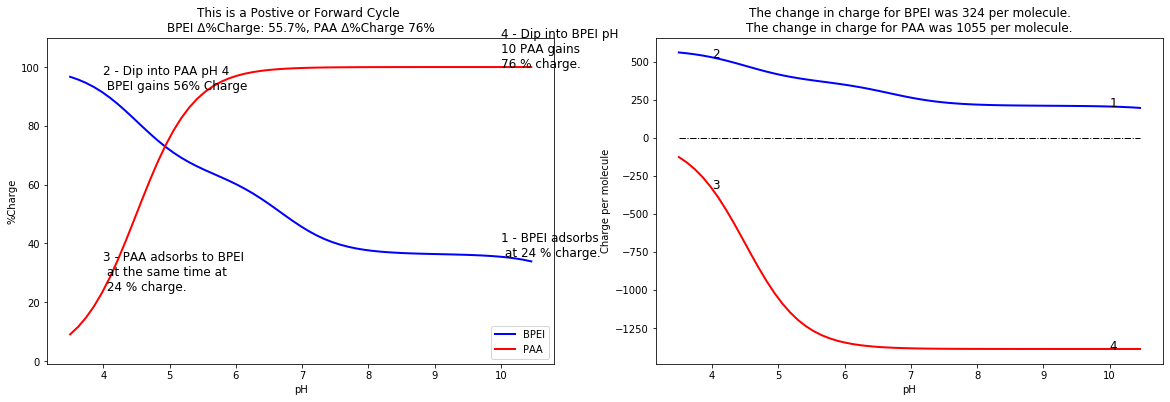

In [60]:
plot_pair('BPEI', 10, 'PAA', 4)

In [ ]:
#For BPEI 10 - PAA 4, there is a large forward charge cycle, this is expected to result in a fast, exponential growth profile

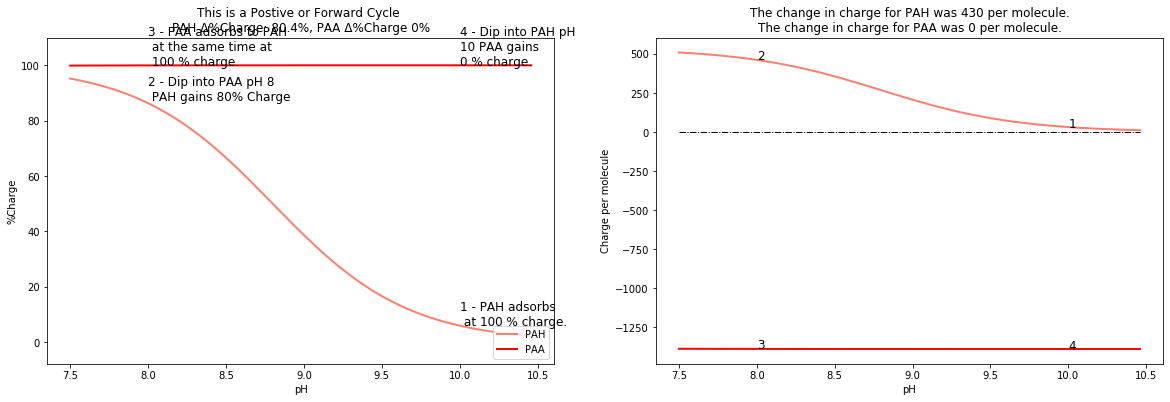

In [61]:
plot_pair('PAH', 10, 'PAA', 8)

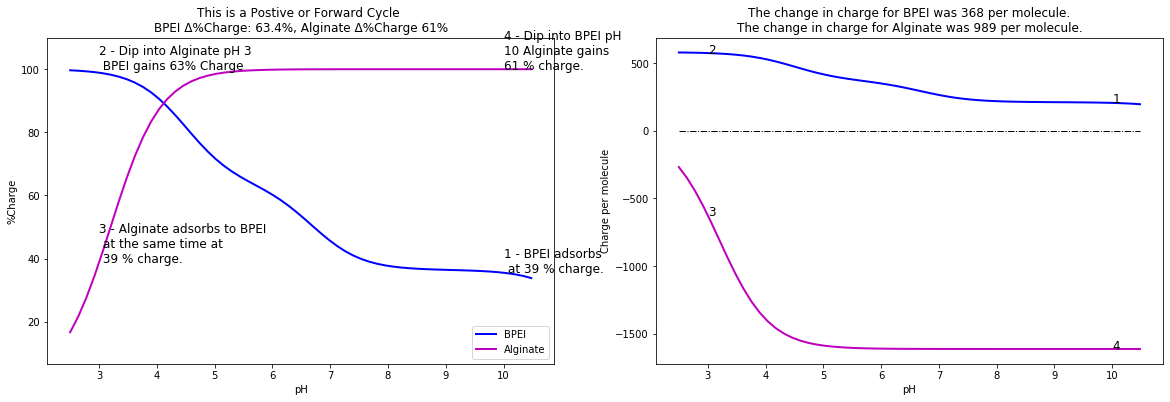

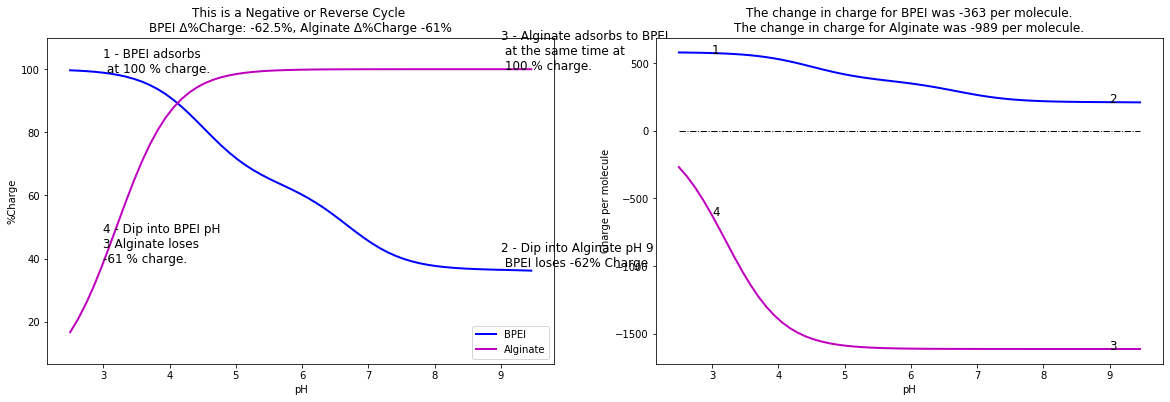

In [62]:
plot_pair('BPEI', 10, 'Alginate', 3)


plot_pair('BPEI', 3, 'Alginate', 9)

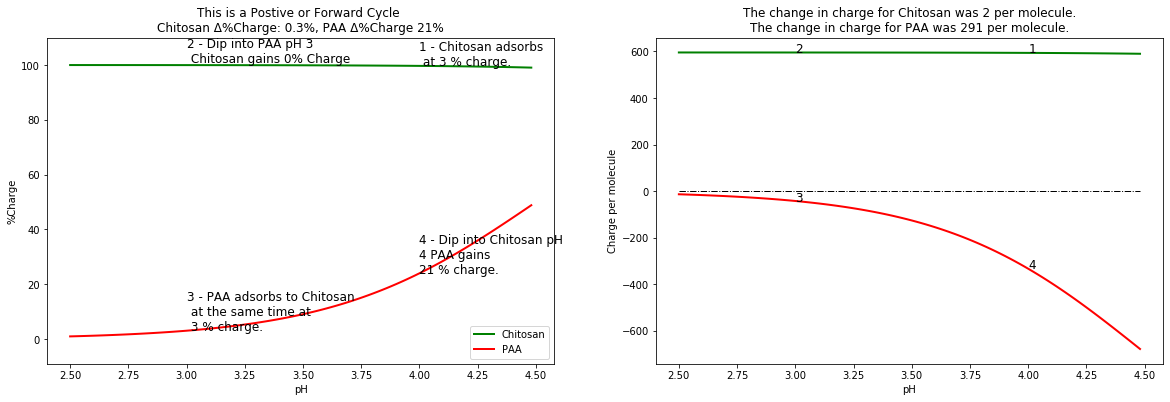

In [63]:
plot_pair('Chitosan', 4, 'PAA', 3)

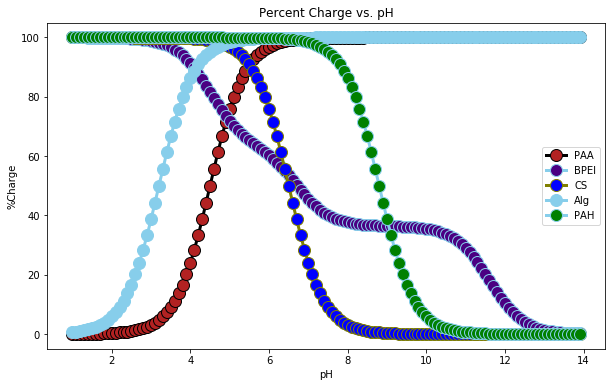

In [64]:
#graphing % Charge Curves of All Polymers in Dictionary

pH_total = np.arange(1,14,0.1)

PAA_curve = []
BPEI_curve = []
Alg_curve = []
CS_curve = []
PAH_curve = []

for x in pH_total:
    PAA_value = percent_charge('PAA', x)
    PAA_curve.append(PAA_value)
    BPEI_value = percent_charge('BPEI', x)
    BPEI_curve.append(BPEI_value)
    CS_value = percent_charge('Chitosan', x)
    CS_curve.append(CS_value)
    Alg_value = percent_charge('Alginate', x)
    Alg_curve.append(Alg_value)
    PAH_value = percent_charge('PAH', x)
    PAH_curve.append(PAH_value)


fig3, ax3 = plt.subplots(figsize= (10,6))
plt.plot( pH_total, PAA_curve, marker='o', label = 'PAA', markerfacecolor='firebrick', markersize=12, color='black', linewidth=3)
plt.plot(  pH_total, BPEI_curve, marker='o',label = 'BPEI', markerfacecolor='indigo', markersize=12, color='skyblue', linewidth=3)
plt.plot(  pH_total, CS_curve, marker='o',label = 'CS', markerfacecolor='blue', markersize=12, color='olive', linewidth=3)
plt.plot(  pH_total, Alg_curve, marker='o',label = 'Alg', markerfacecolor='skyblue', markersize=12, color='skyblue', linewidth=3)
plt.plot(  pH_total, PAH_curve, marker='o',label = 'PAH', markerfacecolor='green', markersize=12, color='skyblue', linewidth=3)

plt.legend()
plt.xlabel('pH')
plt.ylabel('%Charge')
plt.title('Percent Charge vs. pH')



plt.show()

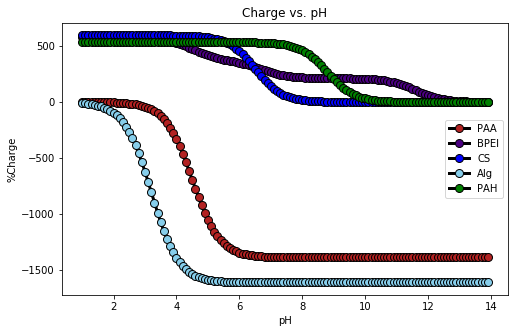

In [65]:
#graphing Charge Curves of All Polymers

pH_total = np.arange(1,14,0.1)

PAA_curve = []
BPEI_curve = []
Alg_curve = []
CS_curve = []
PAH_curve = []

for x in pH_total:
    PAA_value = charge('PAA', x)
    PAA_curve.append(PAA_value)
    BPEI_value = charge('BPEI', x)
    BPEI_curve.append(BPEI_value)
    CS_value = charge('Chitosan', x)
    CS_curve.append(CS_value)
    Alg_value = charge('Alginate', x)
    Alg_curve.append(Alg_value)
    PAH_value = charge('PAH', x)
    PAH_curve.append(PAH_value)


fig3, ax3 = plt.subplots(figsize= (8,5
                                  ))
plt.plot( pH_total, PAA_curve, marker='o', label = 'PAA', markerfacecolor='firebrick', markersize=8, color='black', linewidth=3)
plt.plot(  pH_total, BPEI_curve, marker='o',label = 'BPEI', markerfacecolor='indigo', markersize=8, color='black', linewidth=3)
plt.plot(  pH_total, CS_curve, marker='o',label = 'CS', markerfacecolor='blue', markersize=8, color='black', linewidth=3)
plt.plot(  pH_total, Alg_curve, marker='o',label = 'Alg', markerfacecolor='skyblue', markersize=8, color='black', linewidth=3)
plt.plot(  pH_total, PAH_curve, marker='o',label = 'PAH', markerfacecolor='green', markersize=8, color='black', linewidth=3)

plt.legend(loc='right')
plt.xlabel('pH')
plt.ylabel('%Charge')
plt.title('Charge vs. pH')



plt.show()
plt.show()

In [66]:
delta_charge('Chitosan',6,4)

23.71007641687821

In [67]:
total_dCharge('Chitosan', 4, 'PAA', 3)

21.243582470595715

In [68]:
total_dCharge('BPEI', 10, 'PAA', 4)

131.70363530459562

In [69]:
total_dCharge('BPEI', 9, 'Alginate', 5)

36.99372957829631

In [52]:
total_dCharge('Chitosan', 6, 'Alginate', 3)

85.1491380426754